# Análisis de evolución de factores de gentrificación

In [68]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
# Importar Kmeans de Sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


## <span style="color:red">Lectura de datos</span>

Para la generación del modelo, se van a trabajar con todos los datos correspondientes al año 2019 para identificar los barrios y sus diferentes niveles de gentrificación.

In [69]:
# Lectura csv edad
df_integrado = pd.read_csv('../../dataset/factores_gentrificacion_barrios.csv')
df_integrado

,COD_DISBAR,BARRIOS,ANIO,LATITUD,LONGITUD,num_hospedajes,num_terrazas,num_personas_entre_15_a_44_anios,num_personas_desempleadas,num_personas_con_educacion_superior,num_personas_extranjeras,media_personas_por_vivienda,precio_vivienda_nueva_euro_m2,valor_renta_media
0,11,PALACIO,2019,4474110.875,439417.7914,1088,159.0,9894.0,1235.0,10409.0,4028.0,2.03,5281.56,35509.21
1,12,EMBAJADORES,2019,4473417.211,440397.1764,2021,109.0,22885.0,2704.0,17358.0,11869.0,2.05,5226.91,26762.00
2,13,CORTES,2019,4474035.577,440880.1521,743,62.0,4882.0,533.0,5201.0,2420.0,1.94,0.00,37427.00
3,14,JUSTICIA,2019,4475014.208,440900.7625,851,69.0,7912.0,825.0,8632.0,3667.0,2.00,0.00,41584.00
4,15,UNIVERSIDAD,2019,4475244.247,440020.8477,1428,90.0,15573.0,1599.0,14902.0,6845.0,1.96,7664.88,31866.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,211,ALAMEDA DE OSUNA,2019,4478581.448,449818.2184,24,21.0,6378.0,590.0,7747.0,1104.0,2.69,3401.31,25366.00
120,212,AEROPUERTO,2019,4481029.075,452237.8537,11,4.0,757.0,102.0,194.0,377.0,2.69,0.00,41635.74
121,213,CASCO HISTÓRICO DE BARAJAS,2019,4480530.185,450931.3676,19,23.0,3161.0,386.0,1360.0,1388.0,2.43,0.00,37427.00
122,214,TIMÓN,2019,4480810.557,448842.3002,35,18.0,5231.0,527.0,3696.0,1230.0,2.67,2859.77,41584.00


## <span style="color:red">Análisis multivariante</span>

### <span style="color:blue">1.1 Matriz de Correlación</span>

<AxesSubplot:>

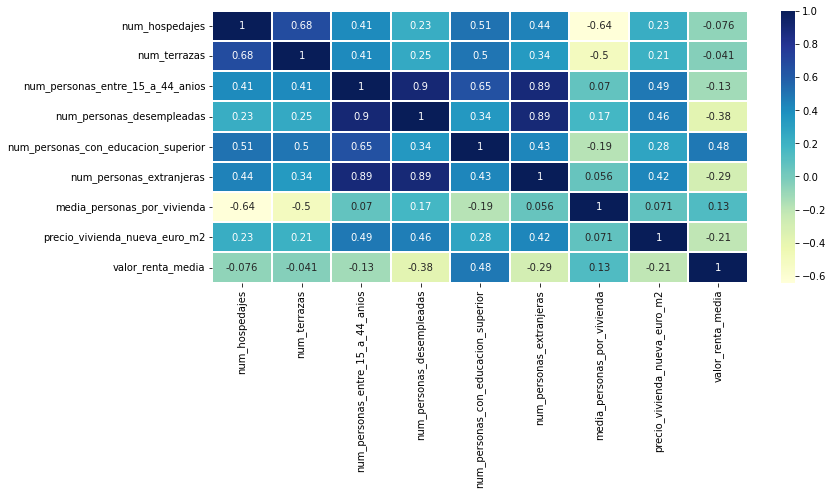

In [70]:
# Dataframe solo con variables numéricas
df_analisis = df_integrado.iloc[:, 5:14]

f, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(df_analisis.corr(method='spearman'), 
            annot=True,
            ax=ax, 
            cmap="YlGnBu", 
            linewidths=0.1)

## Conclusiones

Consideramos que dos variables tienen una importante correlación si tienen un coeficiente de correlación igual o superior a 0.85. En base a esto se puede observar que las siguientes variables están correlacionadas:

* num_personas_entre_15_a_44_anios - num_personas_desempleadas (0,9)
* num_personas_entre_15_a_44_anios - num_personas_extranjeras (0,89)
* num_personas_desempleadas - num_personas_extranjeras (0,89)

Con estos resultados, se observa correlación entre estas variables por lo tanto se va a trabajar con la variable num_personas_extranjeras.

### <span style="color:blue">1.2 Selección de atributos</span>

In [71]:
del(df_analisis['num_personas_entre_15_a_44_anios'])
del(df_analisis['num_personas_desempleadas'])

In [72]:
df_analisis.columns

Index(['num_hospedajes', 'num_terrazas', 'num_personas_con_educacion_superior',
       'num_personas_extranjeras', 'media_personas_por_vivienda',
       'precio_vivienda_nueva_euro_m2', 'valor_renta_media'],
      dtype='object')

## <span style="color:red">Normalización de datos</span>


### <span style="color:blue">2.1 Normalización</span>

Previo a la creación del modelo, se van a trasnformar los datos sobre una escala de valores equivalentes. En este caso se usará el método **"Normalización por la diferencia"**.

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

df_Categoricas = df_integrado.iloc[:, 0:5]

factorGentrDF_numeric = df_analisis

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(factorGentrDF_numeric) 
factorGentrDF_numeric.loc[:,:] = scaled_values

dataFrameNormalizado = df_Categoricas.join(factorGentrDF_numeric)
dataFrameNormalizado.head()


,COD_DISBAR,BARRIOS,ANIO,LATITUD,LONGITUD,num_hospedajes,num_terrazas,num_personas_con_educacion_superior,num_personas_extranjeras,media_personas_por_vivienda,precio_vivienda_nueva_euro_m2,valor_renta_media
0,11,PALACIO,2019,4474110.875,439417.7914,0.538119,0.969512,0.421673,0.334690,0.576705,0.433645,0.398913
1,12,EMBAJADORES,2019,4473417.211,440397.1764,1.000000,0.664634,0.703180,0.986207,0.582386,0.429158,0.300646
2,13,CORTES,2019,4474035.577,440880.1521,0.367327,0.378049,0.210695,0.201080,0.551136,0.000000,0.420457
3,14,JUSTICIA,2019,4475014.208,440900.7625,0.420792,0.420732,0.349686,0.304695,0.568182,0.000000,0.467157
4,15,UNIVERSIDAD,2019,4475244.247,440020.8477,0.706436,0.548780,0.603686,0.568758,0.556818,0.629328,0.357985


## <span style="color:red">Reducción de dimensionalidad</span>

Se aplicará el método Principal Component Analysis (PCA) para reducción de dimensionalidad sobre el conjunto original de datos.

In [74]:
# Cálculo PCA
modeloPCA=PCA(n_components=4)
## Fit Model
modeloPCA.fit(factorGentrDF_numeric)
## Fit Model y aplica reducción de dimensionalidad
resultsPCA = modeloPCA.fit_transform(factorGentrDF_numeric)

totalVarianza = modeloPCA.explained_variance_ratio_
print('[*] Los dos componentes abarcan el ' + str(round(sum(totalVarianza)*100,2)) + '% de la varianza total')

[*] Los dos componentes abarcan el 87.6% de la varianza total


Al trabajar con 4 componentes PCA se logra abarcar el 87.6% de la varianza total y trabajaremos con estos datos para la construcción del modelo Kmeans

In [75]:
## Pasar a Dataframe arrays PCA
dfPCA = pd.DataFrame(resultsPCA, columns = ['PC1','PC2', 'PC3', 'PC4'])
dfPCA.head()

,PC1,PC2,PC3,PC4
0,0.546696,0.404328,-0.505886,0.075443
1,1.046066,0.593115,-0.115373,-0.009843
2,-0.034842,0.150959,-0.218415,-0.124472
3,0.141956,0.137162,-0.237775,-0.163808
4,0.704942,0.408957,-0.236587,0.316897


## <span style="color:red">K-means</span>


Para la creación del moldeo, se va a estimar el número de clusters mediante el metodo del codo

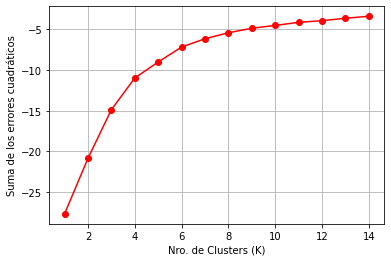

In [76]:
# Definimos rango de valores de K
rangeValueK = range(1, 15) 

# Iterar kmeans para el número de k establecido
vec_kmeans = []
for i in rangeValueK:
    vec_kmeans.append(KMeans(n_clusters=i))

# Ajustar cada modelo
score = []
for j in range(len(vec_kmeans)):
    score.append(vec_kmeans[j].fit(dfPCA).score(dfPCA))

# Grafica
plt.plot(rangeValueK, score, 'ro-')
plt.grid(True)
plt.xlabel('Nro. de Clusters (K)')
plt.ylabel('Suma de los errores cuadráticos')
plt.show()

En la gŕafica se puede observar que cuando <i>k=3</i> se forma el primer codo y la curva empieza a estabilizarse. Esto quiere decir que a partir del valor de <i>k</i> indicado, la distancia media dentro del cluster no ha mejorado (cálculo del nuevo centroide no cambia) por lo tanto se tiene de un cluster compacto.

In [77]:
k=3

In [78]:
modelKmeans = KMeans(n_clusters=k).fit(dfPCA)
centroides = modelKmeans.cluster_centers_
print(centroides)

[[ 0.23293392  0.10772701  0.03458904 -0.020418  ]
 [-0.12419731 -0.17152291  0.00391937  0.00870035]
 [-0.56513341  0.63705143 -0.26001743  0.066754  ]]


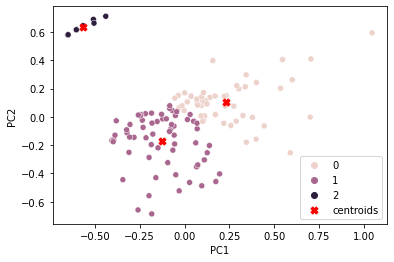

In [79]:
# Gráfica de dataset agrupamiento por modelo kmeans
y_kmeans = modelKmeans.predict(dfPCA)

sns.scatterplot(data=dfPCA, x="PC1", y="PC2", hue=modelKmeans.labels_, cmap='viridis')
plt.scatter(centroides[:,0], centroides[:,1], 
            marker="X", c="red", s=50, label="centroids")
plt.legend()
plt.show()

# fig = plt.figure(figsize=(20,10))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(dfPCA['PC1'],dfPCA['PC2'],dfPCA['PC3'], 
#             c=y_kmeans, cmap='viridis',
#             edgecolor='k', s=40, alpha = 0.5)


# ax.set_title("Cluster PCA Gentrificación")
# ax.set_xlabel("PC1")
# ax.set_ylabel("PC2")
# ax.set_zlabel("PC3")
# ax.dist = 10

# ax.scatter(centroides[:,0], centroides[:,1], centroides[:,2], 
#            s = 300, c = 'r', marker='*', label = 'Centroid')

# plt.autoscale(enable=True, axis='x', tight=True)    

# plt.show()

> Para realizar el analisis de los clusters generados, se va a extraer la media de cada variable para cada clase (0,1,2)

In [80]:
df_integrado['Clase'] = pd.Series(y_kmeans, index=df_integrado.index)
df_integrado

,COD_DISBAR,BARRIOS,ANIO,LATITUD,LONGITUD,num_hospedajes,num_terrazas,num_personas_entre_15_a_44_anios,num_personas_desempleadas,num_personas_con_educacion_superior,num_personas_extranjeras,media_personas_por_vivienda,precio_vivienda_nueva_euro_m2,valor_renta_media,Clase
0,11,PALACIO,2019,4474110.875,439417.7914,1088,159.0,9894.0,1235.0,10409.0,4028.0,2.03,5281.56,35509.21,0
1,12,EMBAJADORES,2019,4473417.211,440397.1764,2021,109.0,22885.0,2704.0,17358.0,11869.0,2.05,5226.91,26762.00,0
2,13,CORTES,2019,4474035.577,440880.1521,743,62.0,4882.0,533.0,5201.0,2420.0,1.94,0.00,37427.00,0
3,14,JUSTICIA,2019,4475014.208,440900.7625,851,69.0,7912.0,825.0,8632.0,3667.0,2.00,0.00,41584.00,0
4,15,UNIVERSIDAD,2019,4475244.247,440020.8477,1428,90.0,15573.0,1599.0,14902.0,6845.0,1.96,7664.88,31866.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,211,ALAMEDA DE OSUNA,2019,4478581.448,449818.2184,24,21.0,6378.0,590.0,7747.0,1104.0,2.69,3401.31,25366.00,1
120,212,AEROPUERTO,2019,4481029.075,452237.8537,11,4.0,757.0,102.0,194.0,377.0,2.69,0.00,41635.74,1
121,213,CASCO HISTÓRICO DE BARAJAS,2019,4480530.185,450931.3676,19,23.0,3161.0,386.0,1360.0,1388.0,2.43,0.00,37427.00,1
122,214,TIMÓN,2019,4480810.557,448842.3002,35,18.0,5231.0,527.0,3696.0,1230.0,2.67,2859.77,41584.00,1


In [81]:
df_clase0 = df_integrado[df_integrado['Clase'] == 0] 
df_clase1 = df_integrado[df_integrado['Clase'] == 1] 
df_clase2 = df_integrado[df_integrado['Clase'] == 2] 

In [82]:
lstMediasC0 = [];
lstMediasC1 = [];
lstMediasC2 = [];
lstIndicador = ['num_hospedajes','num_terrazas', 'num_personas_con_educacion_superior', 
                'num_personas_extranjeras', 'media_personas_por_vivienda',
                'precio_vivienda_nueva_euro_m2', 'valor_renta_media']

# num_hospedajes
mean_clase0_hosepdaje = df_clase0['num_hospedajes'].mean()
mean_clase1_hosepdaje = df_clase1['num_hospedajes'].mean()
mean_clase2_hosepdaje = df_clase2['num_hospedajes'].mean()

# num_terrazas
mean_clase0_terrazas = df_clase0['num_terrazas'].mean()
mean_clase1_terrazas = df_clase1['num_terrazas'].mean()
mean_clase2_terrazas = df_clase2['num_terrazas'].mean()

# num_personas_con_educacion_superior
mean_clase0_educacion_superior = df_clase0['num_personas_con_educacion_superior'].mean()
mean_clase1_educacion_superior = df_clase1['num_personas_con_educacion_superior'].mean()
mean_clase2_educacion_superior = df_clase2['num_personas_con_educacion_superior'].mean()

# num_personas_extranjeras
mean_clase0_extranjeras = df_clase0['num_personas_extranjeras'].mean()
mean_clase1_extranjeras = df_clase1['num_personas_extranjeras'].mean()
mean_clase2_extranjeras = df_clase2['num_personas_extranjeras'].mean()

# media_personas_por_vivienda
mean_clase0_personas_por_vivienda = df_clase0['media_personas_por_vivienda'].mean()
mean_clase1_personas_por_vivienda = df_clase1['media_personas_por_vivienda'].mean()
mean_clase2_personas_por_vivienda = df_clase2['media_personas_por_vivienda'].mean()

# precio_vivienda_nueva_euro_m2
mean_clase0_precio_vivienda = df_clase0['precio_vivienda_nueva_euro_m2'].mean()
mean_clase1_precio_vivienda = df_clase1['precio_vivienda_nueva_euro_m2'].mean()
mean_clase2_precio_vivienda = df_clase2['precio_vivienda_nueva_euro_m2'].mean()

# valor_renta_media
mean_clase0_valor_renta_media = df_clase0['valor_renta_media'].mean()
mean_clase1_valor_renta_media = df_clase1['valor_renta_media'].mean()
mean_clase2_valor_renta_media = df_clase2['valor_renta_media'].mean()

# Construcción final del Dataframe resumen
lstMediasC0.append(mean_clase0_hosepdaje)
lstMediasC1.append(mean_clase1_hosepdaje)
lstMediasC2.append(mean_clase2_hosepdaje)
lstMediasC0.append(mean_clase0_terrazas)
lstMediasC1.append(mean_clase1_terrazas)
lstMediasC2.append(mean_clase2_terrazas)
lstMediasC0.append(mean_clase0_educacion_superior)
lstMediasC1.append(mean_clase1_educacion_superior)
lstMediasC2.append(mean_clase2_educacion_superior)
lstMediasC0.append(mean_clase0_extranjeras)
lstMediasC1.append(mean_clase1_extranjeras)
lstMediasC2.append(mean_clase2_extranjeras)
lstMediasC0.append(mean_clase0_personas_por_vivienda)
lstMediasC1.append(mean_clase1_personas_por_vivienda)
lstMediasC2.append(mean_clase2_personas_por_vivienda)
lstMediasC0.append(mean_clase0_precio_vivienda)
lstMediasC1.append(mean_clase1_precio_vivienda)
lstMediasC2.append(mean_clase2_precio_vivienda)

lstMediasC0.append(mean_clase0_valor_renta_media)
lstMediasC1.append(mean_clase1_valor_renta_media)
lstMediasC2.append(mean_clase2_valor_renta_media)

df_all_idnicadores = {'Valor_Medio_Clase_0': lstMediasC0,
                    'Valor_Medio_Clase_1': lstMediasC1, 
                    'Valor_Medio_Clase_2': lstMediasC2, 
                    'Indicador': lstIndicador}

dfSummary = pd.DataFrame(df_all_idnicadores, columns = ['Valor_Medio_Clase_0', 'Valor_Medio_Clase_1', 
                                               'Valor_Medio_Clase_2', 'Indicador'])
dfSummary

,Valor_Medio_Clase_0,Valor_Medio_Clase_1,Valor_Medio_Clase_2,Indicador
0,208.075472,33.031746,71.25000,num_hospedajes
1,58.433962,21.857143,43.25000,num_terrazas
2,9315.226415,5758.682540,0.00000,num_personas_con_educacion_superior
3,5687.547170,1972.000000,0.00000,num_personas_extranjeras
4,2.471132,2.656984,0.00000,media_personas_por_vivienda
5,2204.428868,829.772381,829.83625,precio_vivienda_nueva_euro_m2
6,34522.521321,47064.588730,0.00000,valor_renta_media


En base a esta tabla de resumen, en base a los valores medios de cada clase y cada variable, se puede categorizar de que consiste cada clase, como se describe a continuación:

* Clase 0 (Gentrificado) - Valores altos con respecto a los demás grupos
* Clase 1 (Alto Riesgo de Gentrificación) - Valores intermedios con respecto a los demás grupos
* Clase 2 (Bajo Riesgo de Gentrificación) - Valores bajos con respecto a los demás grupos

In [83]:
df_integrado.loc[df_integrado['Clase'] == 0, 'Clase'] = 'Gentrificado'
df_integrado.loc[df_integrado['Clase'] == 1, 'Clase'] = 'Alto Riesgo de Gentrificación'
df_integrado.loc[df_integrado['Clase'] == 2, 'Clase'] = 'Bajo Riesgo de Gentrificación'

In [84]:
df_integrado.to_csv('../../dataset/barrios_clusterizados_result.csv', index=False)

In [85]:
df_integrado

,COD_DISBAR,BARRIOS,ANIO,LATITUD,LONGITUD,num_hospedajes,num_terrazas,num_personas_entre_15_a_44_anios,num_personas_desempleadas,num_personas_con_educacion_superior,num_personas_extranjeras,media_personas_por_vivienda,precio_vivienda_nueva_euro_m2,valor_renta_media,Clase
0,11,PALACIO,2019,4474110.875,439417.7914,1088,159.0,9894.0,1235.0,10409.0,4028.0,2.03,5281.56,35509.21,Gentrificado
1,12,EMBAJADORES,2019,4473417.211,440397.1764,2021,109.0,22885.0,2704.0,17358.0,11869.0,2.05,5226.91,26762.00,Gentrificado
2,13,CORTES,2019,4474035.577,440880.1521,743,62.0,4882.0,533.0,5201.0,2420.0,1.94,0.00,37427.00,Gentrificado
3,14,JUSTICIA,2019,4475014.208,440900.7625,851,69.0,7912.0,825.0,8632.0,3667.0,2.00,0.00,41584.00,Gentrificado
4,15,UNIVERSIDAD,2019,4475244.247,440020.8477,1428,90.0,15573.0,1599.0,14902.0,6845.0,1.96,7664.88,31866.00,Gentrificado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,211,ALAMEDA DE OSUNA,2019,4478581.448,449818.2184,24,21.0,6378.0,590.0,7747.0,1104.0,2.69,3401.31,25366.00,Alto Riesgo de Gentrificación
120,212,AEROPUERTO,2019,4481029.075,452237.8537,11,4.0,757.0,102.0,194.0,377.0,2.69,0.00,41635.74,Alto Riesgo de Gentrificación
121,213,CASCO HISTÓRICO DE BARAJAS,2019,4480530.185,450931.3676,19,23.0,3161.0,386.0,1360.0,1388.0,2.43,0.00,37427.00,Alto Riesgo de Gentrificación
122,214,TIMÓN,2019,4480810.557,448842.3002,35,18.0,5231.0,527.0,3696.0,1230.0,2.67,2859.77,41584.00,Alto Riesgo de Gentrificación


## <span style="color:red">Visualización de Clusters - Mapa Barrios de Madrid</span>


> https://arcg.is/1aPTbv

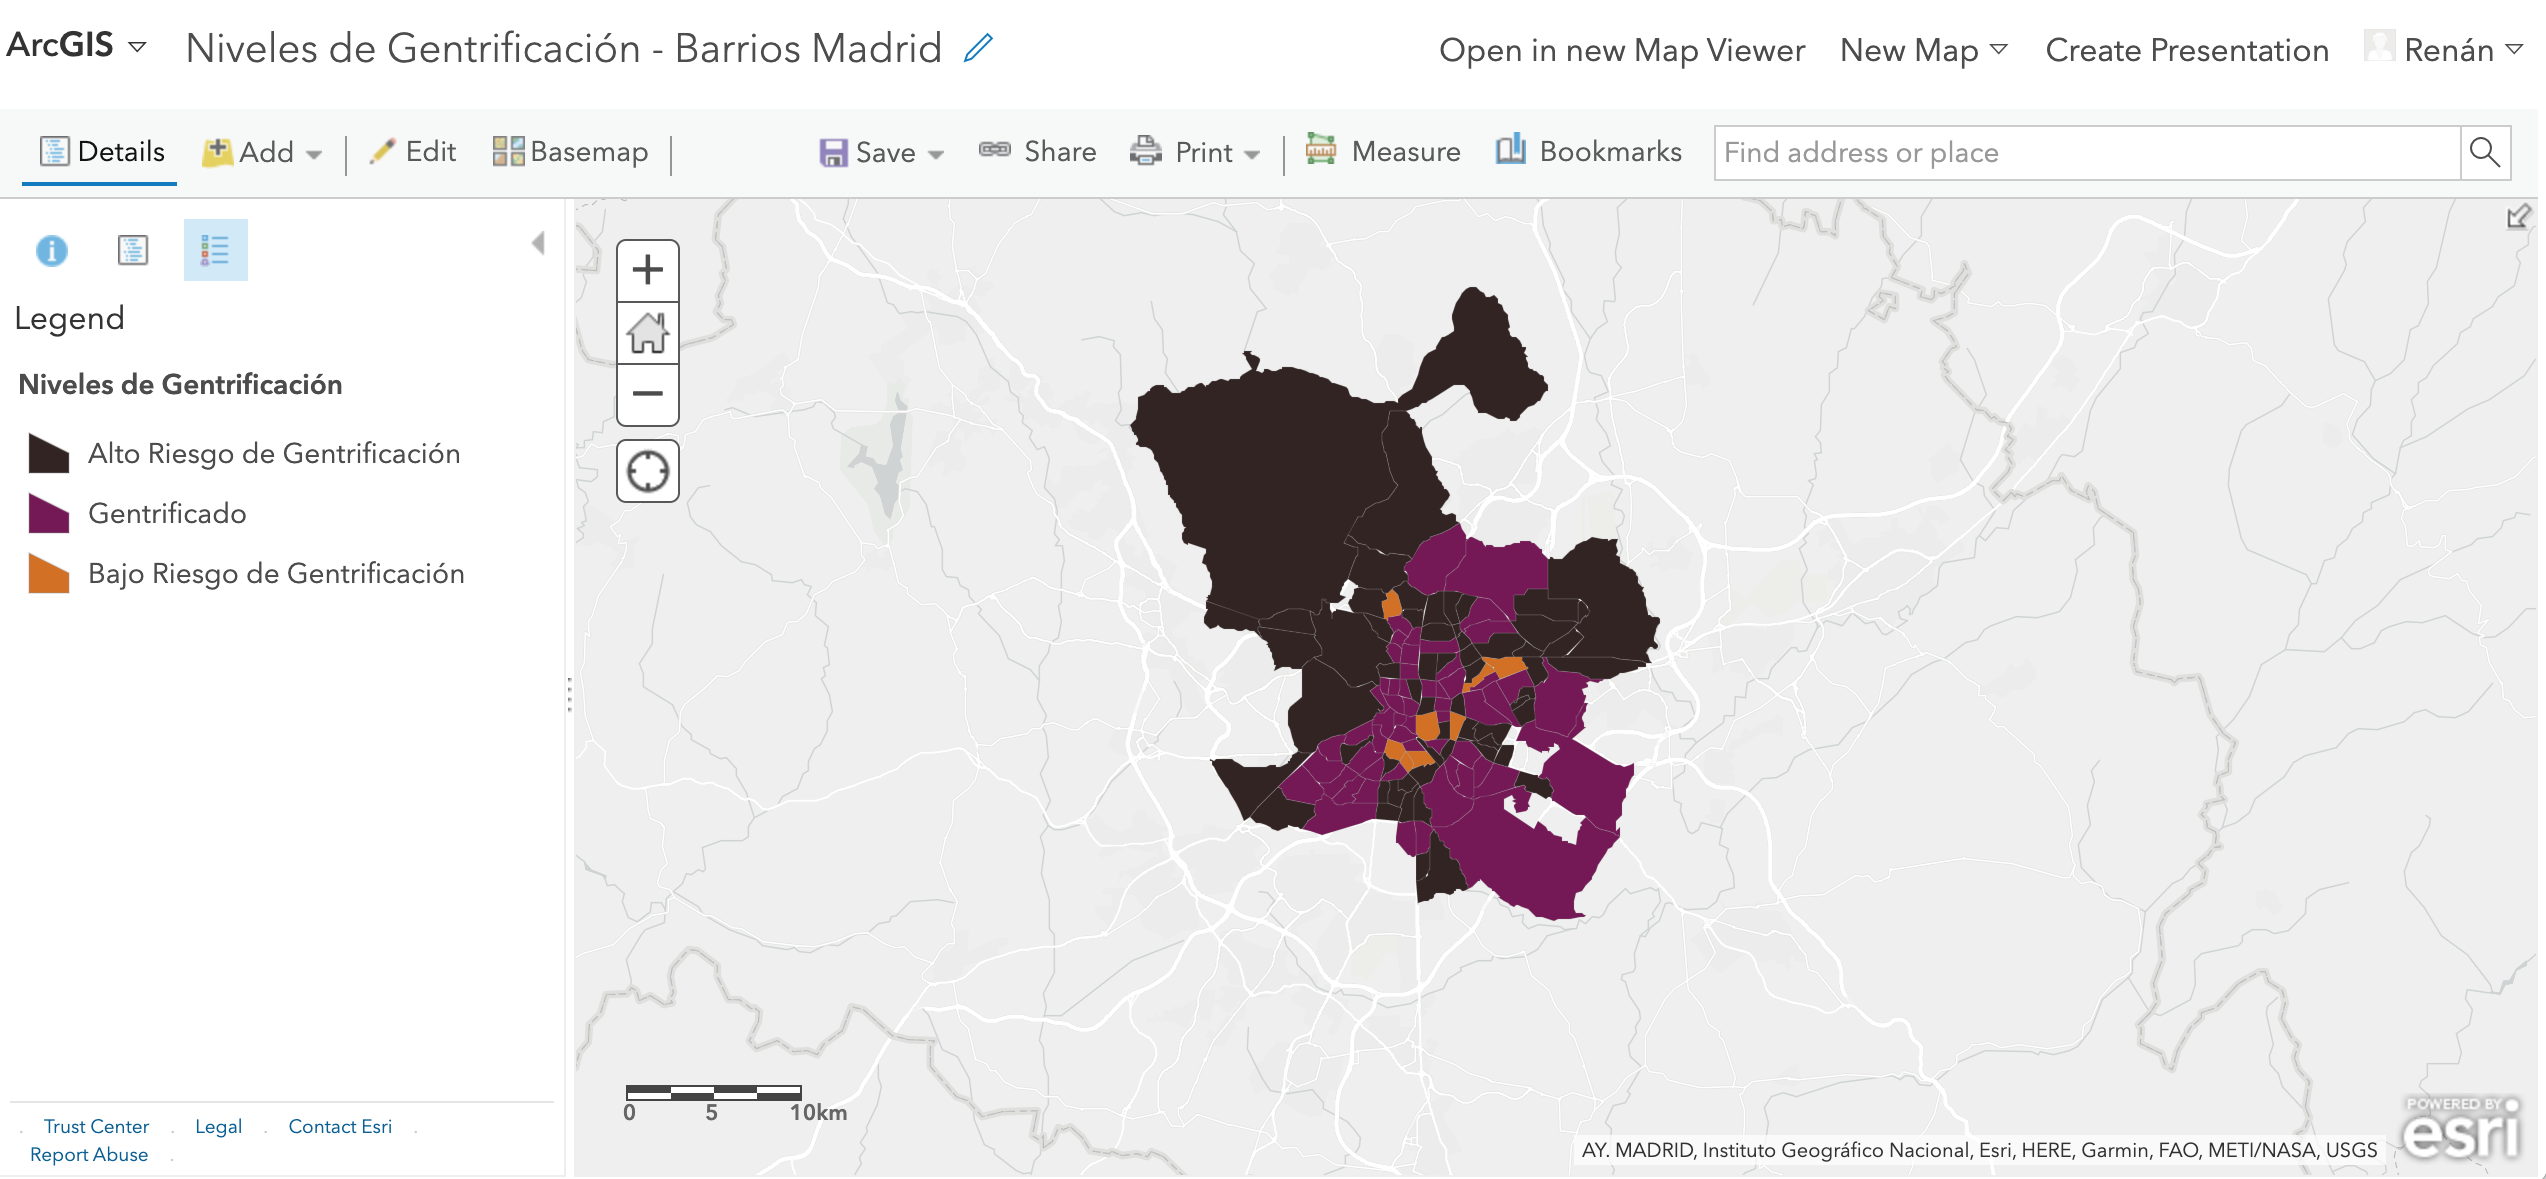